데이터


-> GT dataset : blenedMVS : masked 된 이미지와 그에 대한 GT가 있음 ( mask 목적 >> 배경 제거라고 느껴짐 )


-> unlabeled dataset : google_landmark

In [18]:
import os
import glob
from PIL import Image
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

In [71]:
dataset_path = "/Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS"

input_image_paths = sorted(glob.glob(os.path.join(dataset_path, "blended_images/*_masked.jpg")))
gt_image_paths = sorted(glob.glob(os.path.join(dataset_path, "rendered_depth_maps/*.pfm")))

# 이미지들을 저장할 리스트
# 변환 객체 생성 (이미지를 [0,1] 범위의 텐서로 변환)
to_tensor = transforms.Compose([
    transforms.CenterCrop(448),
    transforms.ToTensor(),
])

images = []
gt = []

# input 이미지: RGB 이미지로 변환 후 텐서화
for path in input_image_paths:
    try:
        img = Image.open(path).convert('RGB')
        tensor_img = to_tensor(img)
        images.append(tensor_img)
        print(f"Loaded image (tensor): {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

# gt (depth map): 'F' 모드로 변환하여 텐서화
for path in gt_image_paths:
    try:
        img = Image.open(path).convert('F')
        tensor_img = to_tensor(img)
        gt.append(tensor_img)
        print(f"Loaded gt (tensor): {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

print(f"총 {len(images)}개의 이미지, {len(gt)}개의 정답")

Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000000_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000001_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000002_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000003_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000004_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000005_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000006_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/blendedMVS/blended_images/00000007_masked.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/bl

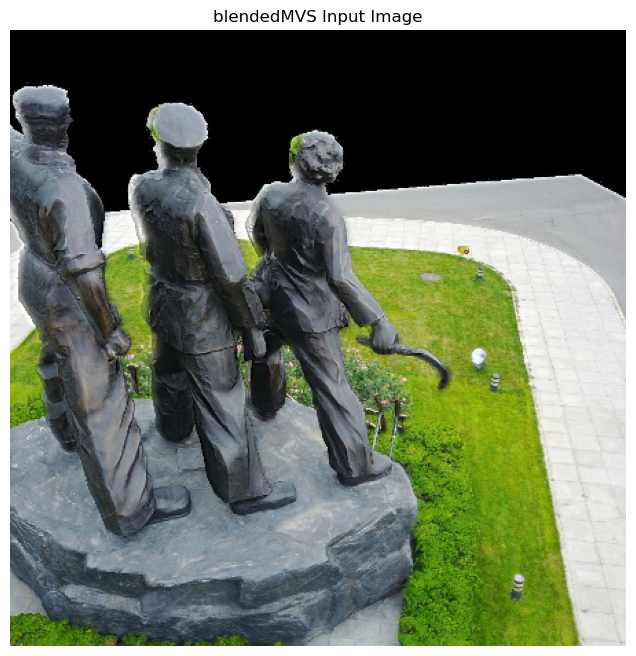

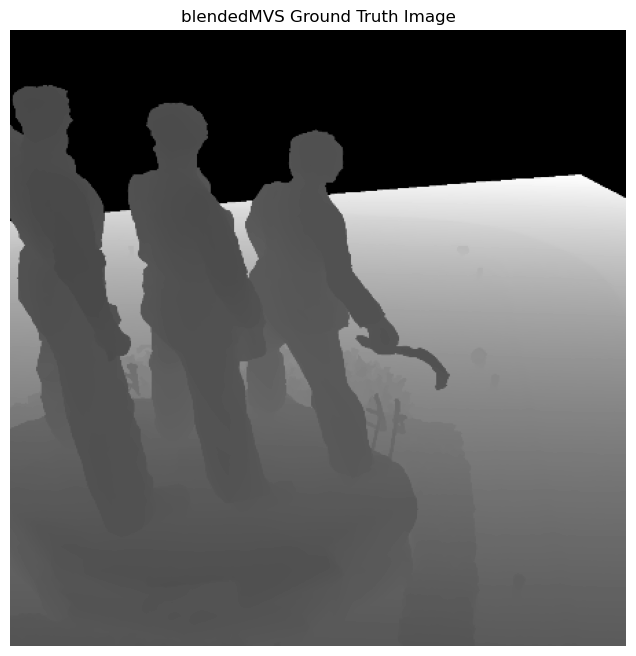

In [72]:
sample_idx = 32

# 입력 이미지 출력 (RGB: C x H x W → H x W x C)
if images and len(images) > sample_idx:
    img_tensor = images[sample_idx]
    # tensor shape (C, H, W) → (H, W, C)
    img_np = img_tensor.permute(1, 2, 0).numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(img_np)
    plt.title("blendedMVS Input Image")
    plt.axis("off")
    plt.show()
else:
    print("sample_idx에 해당하는 입력 이미지가 없습니다.")

# gt 출력 (depth map: 1채널, float → 2D array)
if gt and len(gt) > sample_idx:
    gt_tensor = gt[sample_idx]
    # gt tensor shape가 (1, H, W)라고 가정하고 squeeze하여 (H, W)로 변경
    gt_np = gt_tensor.squeeze(0).numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(gt_np, cmap="gray")
    plt.title("blendedMVS Ground Truth Image")
    plt.axis("off")
    plt.show()
else:
    print("sample_idx에 해당하는 gt 이미지가 없습니다.")

In [73]:
MVS_input = torch.stack(images)
MVS_gt = torch.stack(gt)


ANALYZE

In [74]:
## 해상도가 576, 768 + 이건 metric depth
print(MVS_input.shape)
print(MVS_gt.shape)
print(MVS_input[0][0][0])
print(MVS_gt[0][0][0][:3]) ## 뽑아보면,

torch.Size([91, 3, 448, 448])
torch.Size([91, 1, 448, 448])
tensor([0.9412, 0.9412, 0.9490, 0.9412, 0.9529, 0.9490, 0.9608, 0.9608, 0.9569,
        0.8980, 0.8863, 0.8824, 0.6902, 0.4667, 0.3333, 0.2980, 0.3059, 0.4863,
        0.4588, 0.5255, 0.5529, 0.5882, 0.5647, 0.5882, 0.6157, 0.6078, 0.5529,
        0.5608, 0.5529, 0.4549, 0.4667, 0.5020, 0.5059, 0.6078, 0.5765, 0.5176,
        0.5255, 0.5176, 0.4824, 0.5020, 0.5059, 0.6078, 0.7843, 0.8510, 0.9059,
        0.9804, 0.9882, 0.9961, 0.9961, 1.0000, 0.9961, 0.9922, 0.9804, 0.5608,
        0.5137, 0.4706, 0.4275, 0.4667, 0.4510, 0.5333, 0.5608, 0.5294, 0.5725,
        0.5176, 0.5804, 0.6157, 0.6078, 0.5922, 0.5529, 0.5569, 0.5647, 0.6039,
        0.6275, 0.6392, 0.6196, 0.6078, 0.6353, 0.5804, 0.5765, 0.6314, 0.5922,
        0.5804, 0.6549, 0.6157, 0.6196, 0.6000, 0.5882, 0.5647, 0.6157, 0.5765,
        0.5686, 0.5843, 0.5608, 0.5882, 0.5490, 0.5882, 0.5020, 0.5490, 0.6196,
        0.5686, 0.5725, 0.6275, 0.6235, 0.6392, 0.5922, 0.60

In [47]:
dataset_path_landmark = "/Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/"

input_image_paths_landmark = sorted(glob.glob(os.path.join(dataset_path, "*.jpg")))

to_tensor = transforms.ToTensor()

images_landmark = []

# input 이미지: RGB 이미지로 변환 후 텐서화
for path in input_image_paths_landmark:
    try:
        img = Image.open(path).convert('RGB')
        tensor_img = to_tensor(img)
        images_landmark.append(tensor_img)
        print(f"Loaded image (tensor): {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

print(f"총 {len(images_landmark)}개의 이미지")

Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/008000e40c84357b.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00800254270bd8af.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00800f4ef87e31de.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00800fc903c4b56a.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/008010296b2cc8fd.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/008010fe7d5f070b.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00801c2f87135eaf.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00801cdfcd793ce5.jpg
Loaded image (tensor): /Users/minhyeokroh/Documents/2025-1/DA_dataset/google_landmark/00801edab50642e2.jpg
Loaded image (tensor): /Users/minhyeo

In [70]:
print(len(images_landmark[0][1][4][:]))

800
